<a href="https://colab.research.google.com/github/Fissureee/PCVK/blob/main/Jobsheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


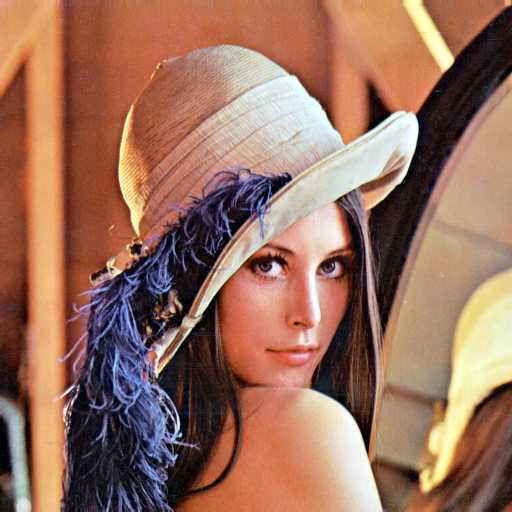

In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import math
import os
import glob
import matplotlib.pyplot as plt

lena_image = cv.imread('/content/drive/MyDrive/PCVK_assets/lena.jpg')
cv2_imshow(lena_image)

**3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini**

- Start
- Input Image
- Menghitung jumlah kemunculan setiap pixel warna RGB pada seluruh pixel citra yang ada
- Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan intensitas warna tersebut
- Histogram Citra RGB
- End

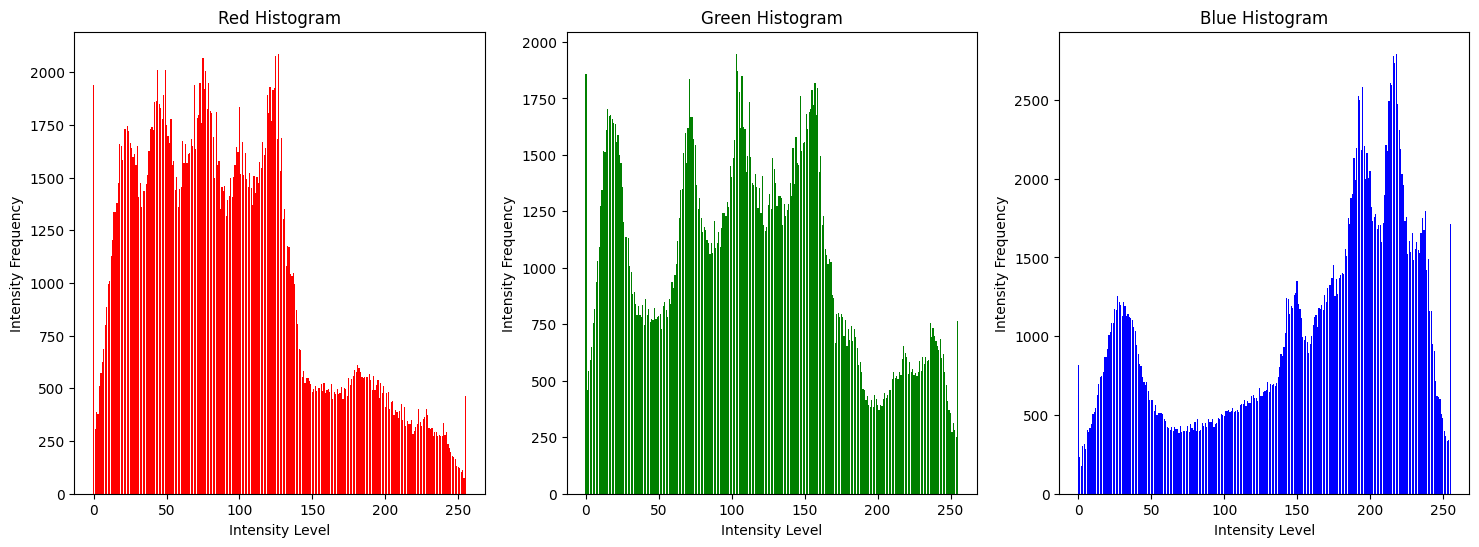

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def compute_histogram_red(img):
    red_channel = img[:, :, 0].ravel()
    hist_r = np.zeros(256, dtype=int)
    for pixel in red_channel:
        hist_r[pixel] += 1
    return hist_r

def compute_histogram_green(img):
    green_channel = img[:, :, 1].ravel()
    hist_g = np.zeros(256, dtype=int)
    for pixel in green_channel:
        hist_g[pixel] += 1
    return hist_g

def compute_histogram_blue(img):
    blue_channel = img[:, :, 2].ravel()
    hist_b = np.zeros(256, dtype=int)
    for pixel in blue_channel:
        hist_b[pixel] += 1
    return hist_b

hist_r = compute_histogram_red(lena_image)
hist_g = compute_histogram_green(lena_image)
hist_b = compute_histogram_blue(lena_image)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_r, color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g, color='green')
plt.title('Green Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_b, color='blue')
plt.title('Blue Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.show()


**4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?**

Iya, output yang dihasilkan sama dengan no. 3

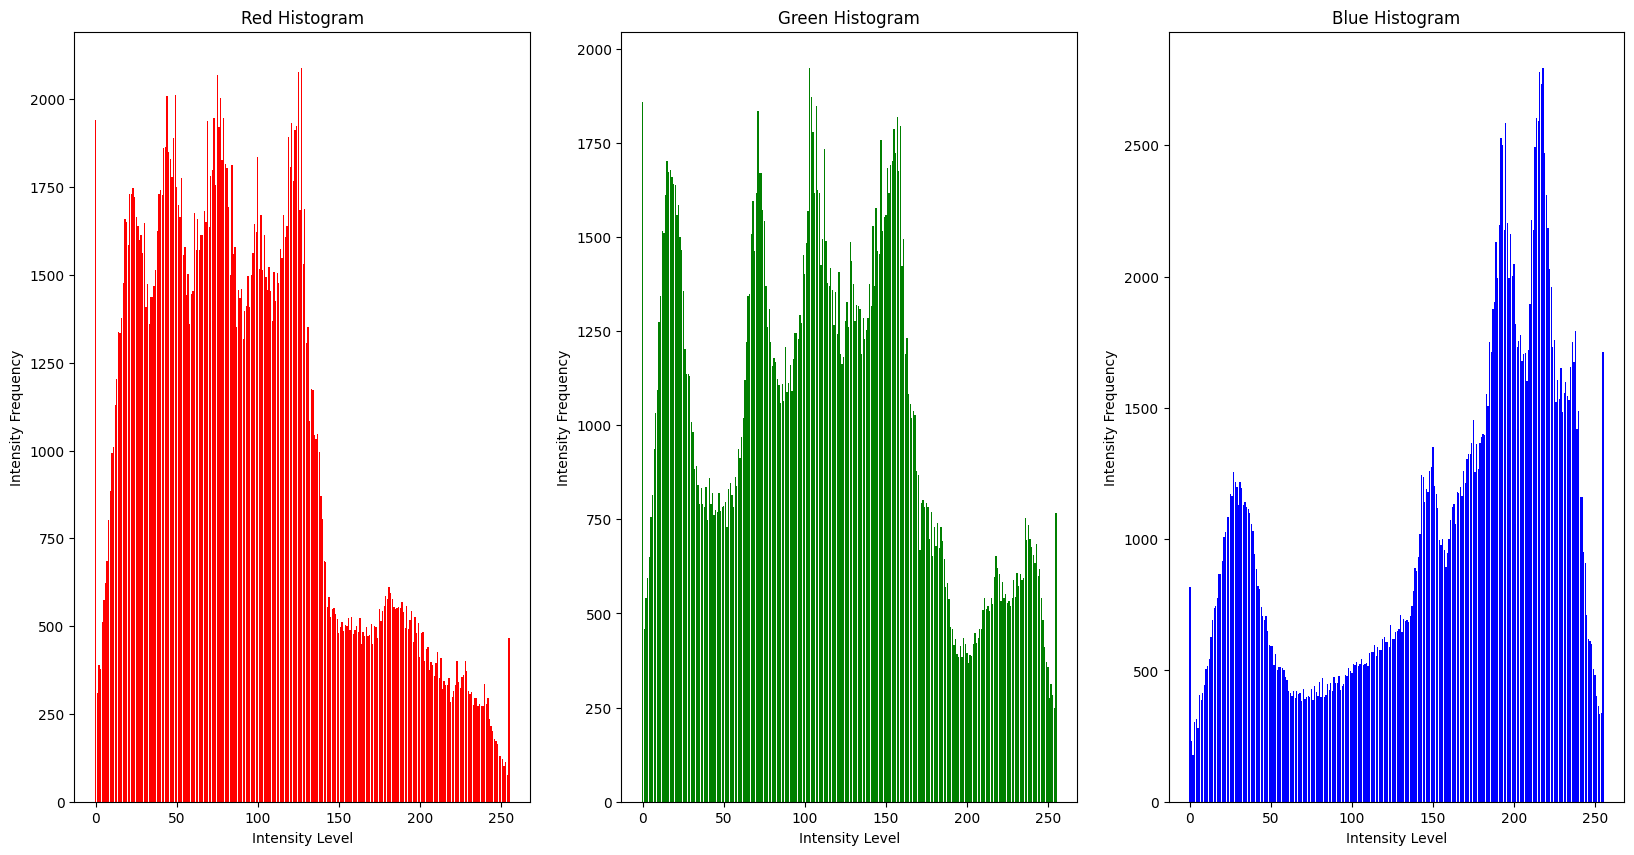

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def histogram_np(image):
    red = image[:, :, 0].flatten()
    green = image[:, :, 1].flatten()
    blue = image[:, :, 2].flatten()
    red_hist = np.histogram(red, bins=256, range=(0, 256))
    green_hist = np.histogram(green, bins=256, range=(0, 256))
    blue_hist = np.histogram(blue, bins=256, range=(0, 256))
    return red_hist, green_hist, blue_hist

# Assuming 'lena_image' is your input image in NumPy array format
red_hist_np, green_hist_np, blue_hist_np = histogram_np(lena_image)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.bar(np.arange(256), red_hist_np[0], color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), green_hist_np[0], color='green')
plt.title('Green Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), blue_hist_np[0], color='blue')
plt.title('Blue Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Intensity Frequency')

plt.show()


**5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)**

- Start
- Input Image
- Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi)
- Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
- Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui, kemudian dibagi dengan jumlah pixel
- Implementasi rumus K0, dimana pembagian dengan nilai pixel sudah dilakukan sebelumnya (Skala warna)
- Hasil Histogram Equalization
- Transformasi kembali dalam bentuk citra
- Citra Hasil Histogram Equalization
- Plot Histogram RGB dan Histogram Equalization
- End

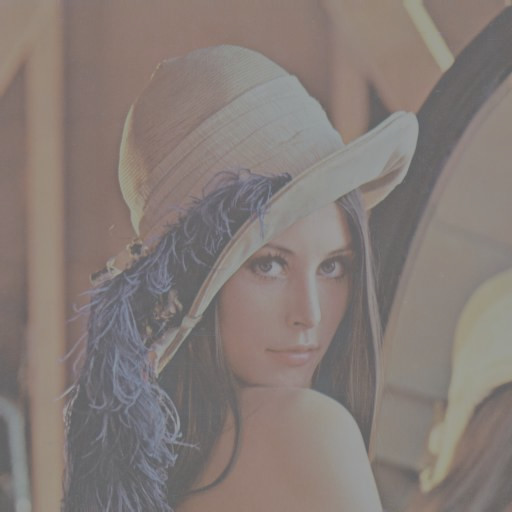

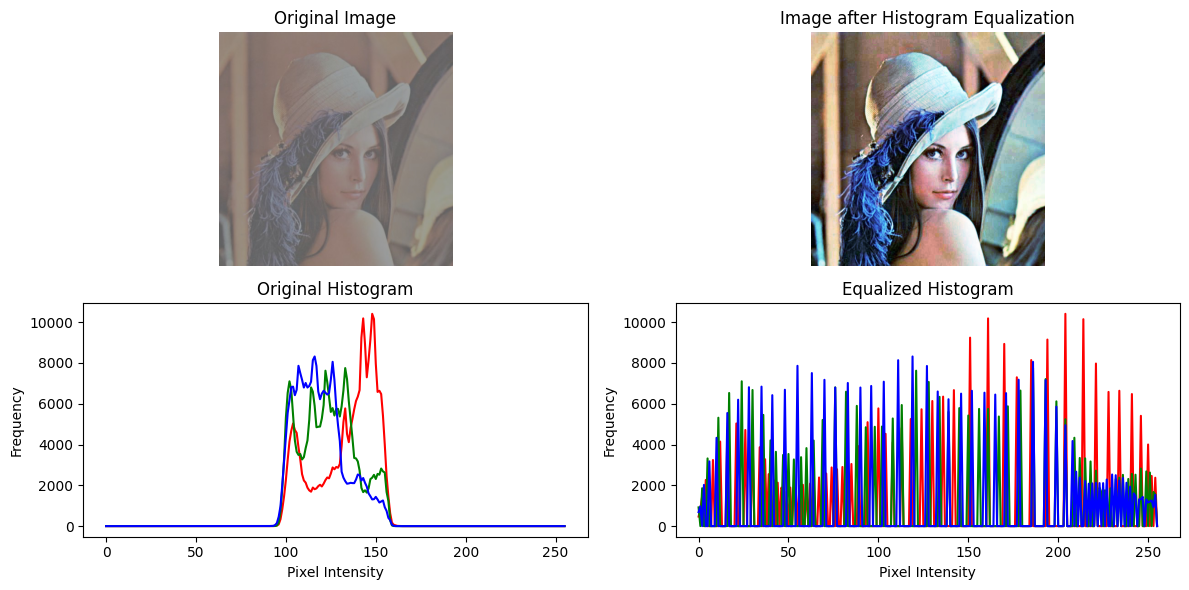

In [17]:
# 1. Input image
image = cv.imread('/content/drive/MyDrive/PCVK_assets/lena_lc.jpg')
cv2_imshow(image)

# Convert to RGB (cv2 uses BGR by default)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 2. Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi)
def compute_histogram(image):
    hist_r, _ = np.histogram(image[:, :, 0].ravel(), bins=256, range=(0, 256))
    hist_g, _ = np.histogram(image[:, :, 1].ravel(), bins=256, range=(0, 256))
    hist_b, _ = np.histogram(image[:, :, 2].ravel(), bins=256, range=(0, 256))
    return hist_r, hist_g, hist_b

# 3. Penjumlahan kumulatif frekuensi
def cumulative_histogram(hist):
    return np.cumsum(hist)

# 4. Normalisasi kumulatif frekuensi
def normalize_histogram(cumulative_hist, total_pixels):
    return (cumulative_hist * 255) / total_pixels

# 5. Implementasi rumus Histogram Equalization untuk setiap channel
def equalize_channel(channel):
    hist, _ = np.histogram(channel.ravel(), 256, [0, 256])
    cum_hist = cumulative_histogram(hist)
    normalized_hist = normalize_histogram(cum_hist, channel.size)
    equalized = np.interp(channel.ravel(), range(0, 256), normalized_hist).reshape(channel.shape)
    return equalized.astype(np.uint8)

def histogram_equalization(image):
    r_channel = equalize_channel(image[:, :, 0])
    g_channel = equalize_channel(image[:, :, 1])
    b_channel = equalize_channel(image[:, :, 2])
    equalized_image = cv.merge((r_channel, g_channel, b_channel))
    return equalized_image

# 6. Transformasi hasil Histogram Equalization kembali dalam bentuk citra
equalized_image = histogram_equalization(image_rgb)

# 7. Plot gambar asli dan hasil histogram equalization
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Gambar setelah histogram equalization
plt.subplot(2, 2, 2)
plt.imshow(equalized_image)
plt.title('Image after Histogram Equalization')
plt.axis('off')

# 8. Plot Histogram RGB asli
hist_r, hist_g, hist_b = compute_histogram(image_rgb)

plt.subplot(2, 2, 3)
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# 9. Plot Histogram RGB setelah histogram equalization
hist_eq_r, hist_eq_g, hist_eq_b = compute_histogram(equalized_image)

plt.subplot(2, 2, 4)
plt.plot(hist_eq_r, color='red')
plt.plot(hist_eq_g, color='green')
plt.plot(hist_eq_b, color='blue')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?**

Iya, output yang dihasilkan sama

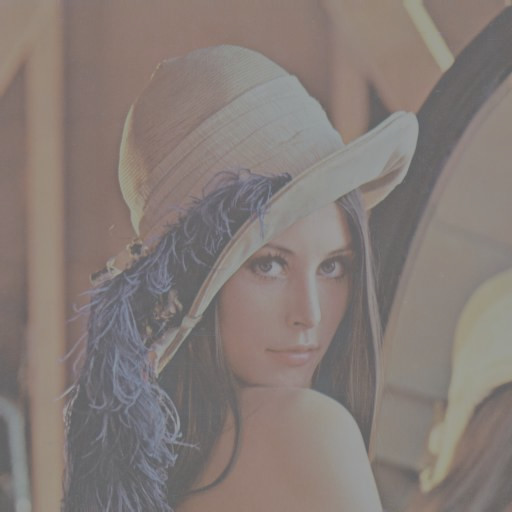

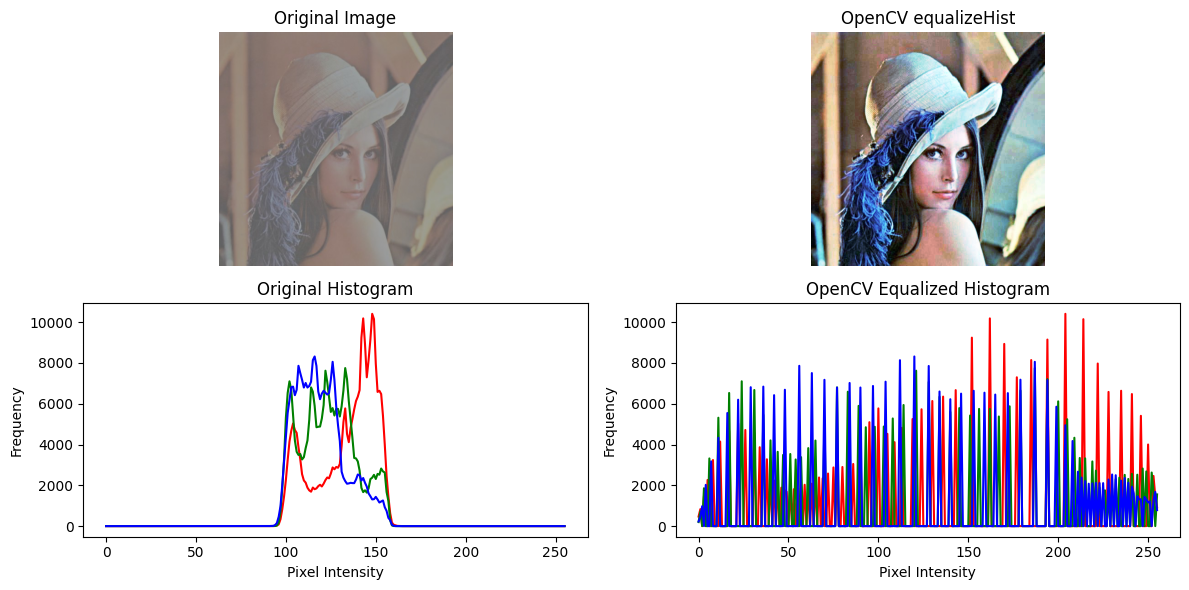

In [19]:
# 1. Input image
image = cv.imread('/content/drive/MyDrive/PCVK_assets/lena_lc.jpg')
cv2_imshow(image)

# Convert to RGB (cv2 uses BGR by default)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 2. Menggunakan library OpenCV equalizeHist untuk setiap channel (R, G, B)
def opencv_histogram_equalization(image):
    r_channel = cv.equalizeHist(image[:, :, 0])
    g_channel = cv.equalizeHist(image[:, :, 1])
    b_channel = cv.equalizeHist(image[:, :, 2])
    equalized_image = cv.merge((r_channel, g_channel, b_channel))
    return equalized_image

# 3. Hasil dari OpenCV Histogram Equalization
opencv_equalized_image = opencv_histogram_equalization(image_rgb)

# 4. Plot gambar asli dan hasil OpenCV equalizeHist
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Gambar hasil OpenCV equalizeHist
plt.subplot(2, 2, 2)
plt.imshow(opencv_equalized_image)
plt.title('OpenCV equalizeHist')
plt.axis('off')

# 5. Plot Histogram RGB asli
hist_r, hist_g, hist_b = compute_histogram(image_rgb)

plt.subplot(2, 2, 3)
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# 6. Plot Histogram RGB setelah histogram equalization menggunakan OpenCV
hist_ocv_r, hist_ocv_g, hist_ocv_b = compute_histogram(opencv_equalized_image)

plt.subplot(2, 2, 4)
plt.plot(hist_ocv_r, color='red')
plt.plot(hist_ocv_g, color='green')
plt.plot(hist_ocv_b, color='blue')
plt.title('OpenCV Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)**

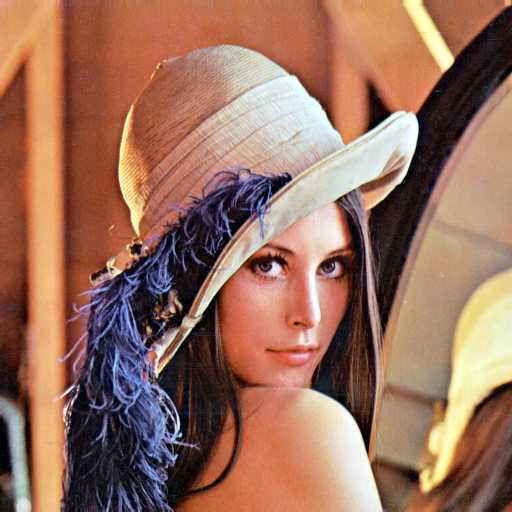

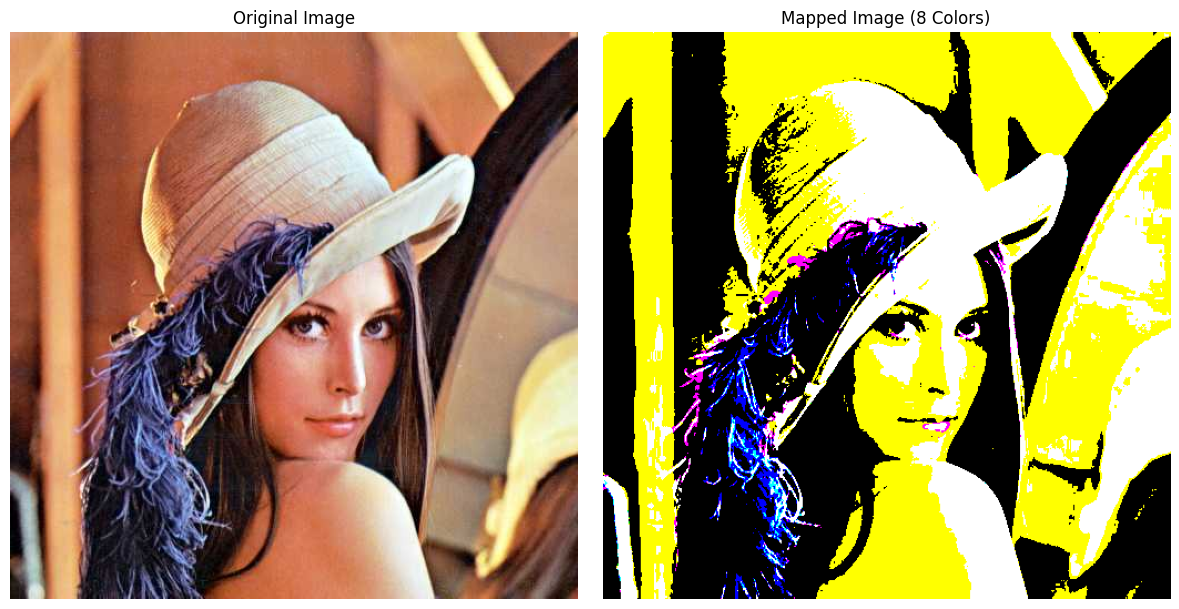

In [21]:
# Define the color palette
palette = {
    'black': np.array([0, 0, 0]),
    'green': np.array([0, 255, 0]),
    'yellow': np.array([255, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'white': np.array([255, 255, 255])
}

# Convert palette to an array for easier processing
palette_colors = np.array(list(palette.values()))

# Function to map colors to the nearest color in the palette
def color_mapping(image):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    # Create an output array
    mapped_pixels = np.zeros(pixels.shape, dtype=np.uint8)

    # For each pixel, find the nearest color in the palette
    for i, pixel in enumerate(pixels):
        # Calculate the distance from the pixel to each color in the palette
        distances = np.linalg.norm(palette_colors - pixel, axis=1)
        # Find the index of the closest color
        closest_color_index = np.argmin(distances)
        # Assign the closest color to the output
        mapped_pixels[i] = palette_colors[closest_color_index]

    # Reshape back to the original image shape
    return mapped_pixels.reshape(image.shape)

# 1. Input image
image = cv.imread('/content/drive/MyDrive/PCVK_assets/lena.jpg')
cv2_imshow(image)

# Convert to RGB (cv2 uses BGR by default)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 2. Map the colors in the image
mapped_image = color_mapping(image_rgb)

# 3. Plot the original and mapped images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Mapped image
plt.subplot(1, 2, 2)
plt.imshow(mapped_image)
plt.title('Mapped Image (8 Colors)')
plt.axis('off')

plt.tight_layout()
plt.show()

**8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)**

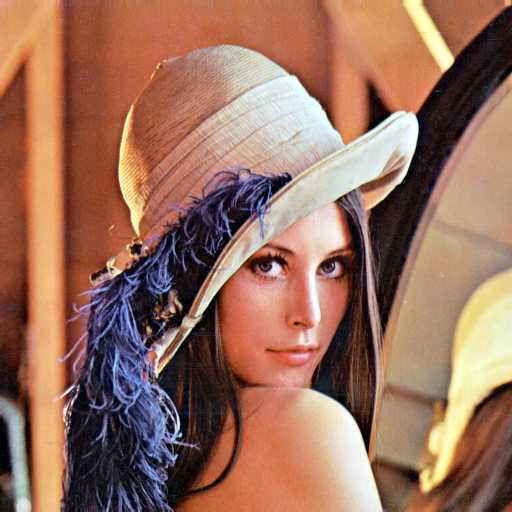

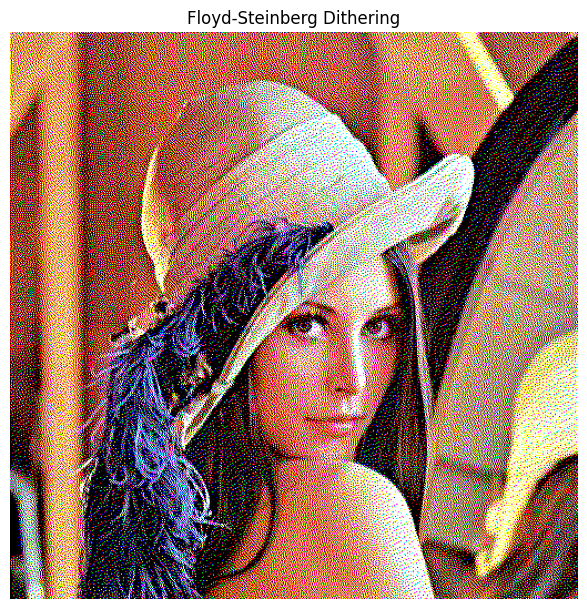

In [25]:
def floyd_steinberg_dithering_rgb(image):
    # Create a copy of the image to store the dithered result
    dithered_image = np.zeros_like(image)

    height, width, channels = image.shape

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Process each color channel
                old_pixel = image[y, x, c]
                new_pixel = 255 if old_pixel > 128 else 0
                dithered_image[y, x, c] = new_pixel
                error = old_pixel - new_pixel

                # Distribute the error to the neighboring pixels
                if x + 1 < width:
                    image[y, x + 1, c] = np.clip(image[y, x + 1, c] + error * 7 / 16, 0, 255)
                if x - 1 >= 0 and y + 1 < height:
                    image[y + 1, x - 1, c] = np.clip(image[y + 1, x - 1, c] + error * 3 / 16, 0, 255)
                if y + 1 < height:
                    image[y + 1, x, c] = np.clip(image[y + 1, x, c] + error * 5 / 16, 0, 255)
                if x + 1 < width and y + 1 < height:
                    image[y + 1, x + 1, c] = np.clip(image[y + 1, x + 1, c] + error * 1 / 16, 0, 255)

    return dithered_image

# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK_assets/lena.jpg')
cv2_imshow(image)

# Apply Floyd-Steinberg dithering
dithered_image = floyd_steinberg_dithering_rgb(image)

# Plot the original and dithered images
plt.figure(figsize=(12, 6))

# Dithered image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()

**9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!**

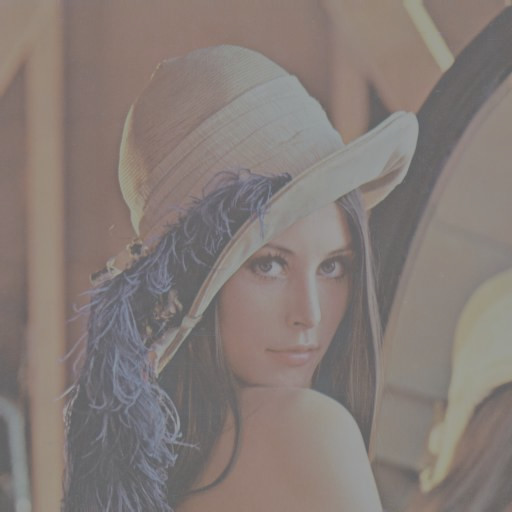

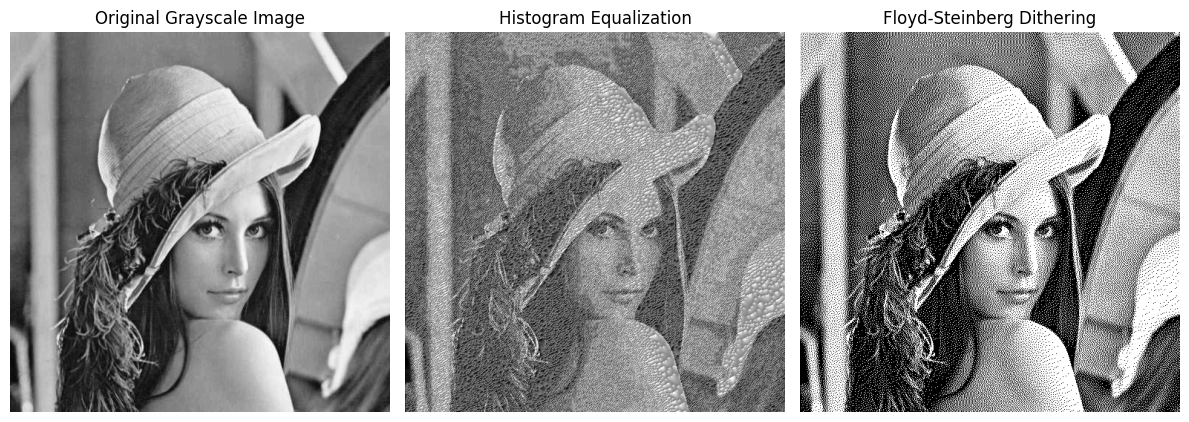

In [26]:
# Function to apply histogram equalization
def histogram_equalization(gray_image):
    return cv.equalizeHist(gray_image)

# Function for Floyd-Steinberg dithering
def floyd_steinberg_dithering(image):
    dithered_image = np.zeros_like(image)

    height, width = image.shape

    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            dithered_image[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < width:
                image[y, x + 1] = np.clip(image[y, x + 1] + error * 7 / 16, 0, 255)
            if x - 1 >= 0 and y + 1 < height:
                image[y + 1, x - 1] = np.clip(image[y + 1, x - 1] + error * 3 / 16, 0, 255)
            if y + 1 < height:
                image[y + 1, x] = np.clip(image[y + 1, x] + error * 5 / 16, 0, 255)
            if x + 1 < width and y + 1 < height:
                image[y + 1, x + 1] = np.clip(image[y + 1, x + 1] + error * 1 / 16, 0, 255)

    return dithered_image

# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK_assets/lena_lc.jpg')
cv2_imshow(image)

# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = histogram_equalization(gray_image)

# Apply Floyd-Steinberg dithering
dithered_image = floyd_steinberg_dithering(equalized_image)

# Plot the results
plt.figure(figsize=(12, 6))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

# Dithered image
plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()